In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('bsbm.csv')
df

,program,profile,graph,loading,process
0,rust,RDFS,10,0.062114,0.003490
1,rust,RDFS,10,0.046012,0.003031
2,rust,RDFS,10,0.045814,0.002998
3,rust,RDFS,10,0.046369,0.003513
4,rust,RDFS,10,0.045431,0.003556
5,rust,RHODF,10,0.046454,0.000786
6,rust,RHODF,10,0.046373,0.000657
7,rust,RHODF,10,0.047734,0.000711
8,rust,RHODF,10,0.046187,0.000537
9,rust,RHODF,10,0.048548,0.000707


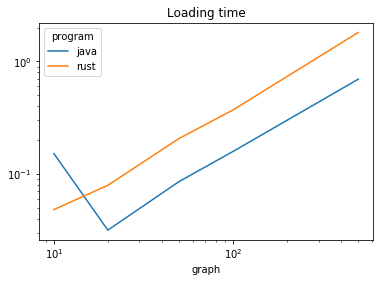

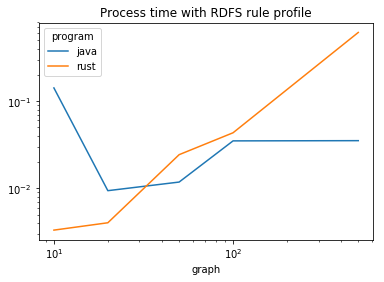

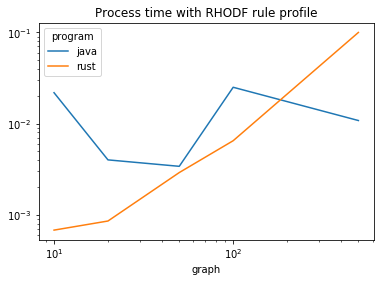

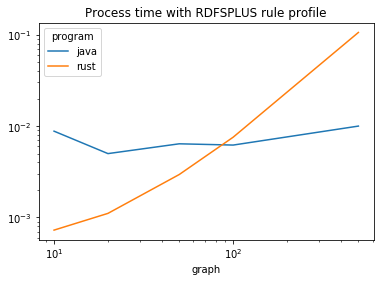

In [14]:
profiles = list(set(df['profile']))
data = df.groupby(['program','graph'])
means = data['loading'].mean().unstack().transpose()
ax = means.plot(title='Loading time',loglog=True)
ax
for profile in profiles:
    data = df[df['profile']==profile].groupby(['program','graph'])
    means = data['process'].mean().unstack().transpose()
    ax = means.plot(title='Process time with {} rule profile'.format(profile),loglog=True)
    ax